In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [7]:
path= 'C:/Users/bensa/deeplearningProjet1/IOTProjet/plant_growth_data.csv'
data = pd.read_csv(path,  encoding = "ISO-8859-1")

In [9]:
data.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [11]:
df=data.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


# 1 : Exploratory Data Analysis


In [16]:
df = data.copy()

In [18]:
df.shape

(193, 7)

<Axes: ylabel='count'>

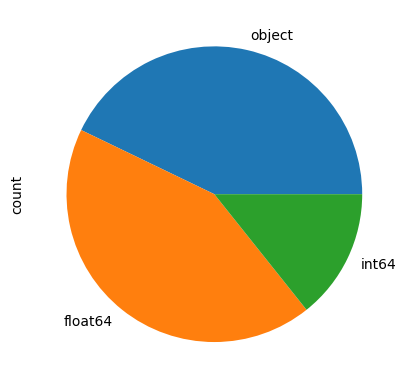

In [20]:
#Types de données
df.dtypes.value_counts().plot.pie()

In [22]:
# # Afficher une carte thermique des valeurs manquantes dans un DataFrame :  ( pas de valeurs manquantes )

# plt.figure(figsize=(20,10))
# sns.heatmap(df.isna(), cbar = True)

In [24]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)    # pourcentage de valeurs manquante pour chaque colonnes pour effacer ceux qui sont presque vide 

Soil_Type           0.0
Sunlight_Hours      0.0
Water_Frequency     0.0
Fertilizer_Type     0.0
Temperature         0.0
Humidity            0.0
Growth_Milestone    0.0
dtype: float64

# Analyse du Fond
### Examen de la colonne target


In [27]:
df['Growth_Milestone'].value_counts(normalize=True)

Growth_Milestone
0    0.502591
1    0.497409
Name: proportion, dtype: float64

### histogrames des variables continues

C:\Users\bensa\AppData\Local\Temp\ipykernel_8160\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\bensa\AppData\Local\Temp\ipykernel_8160\2417630899.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\bensa\AppData\Local\Temp\ipykernel_8160\24176

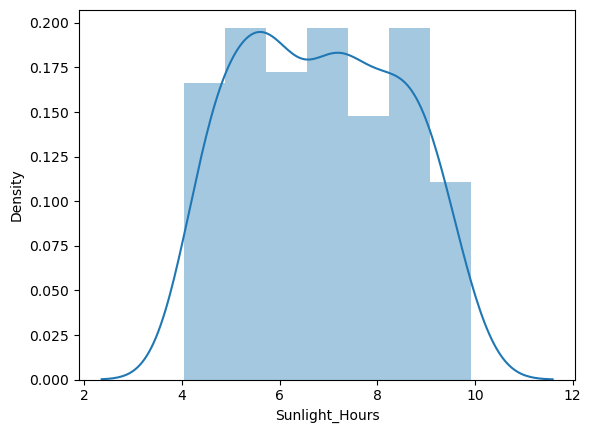

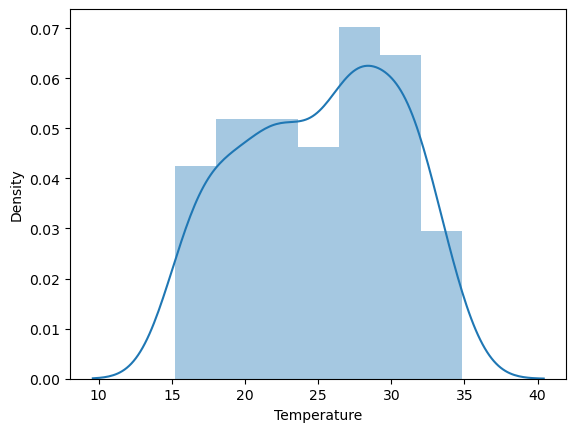

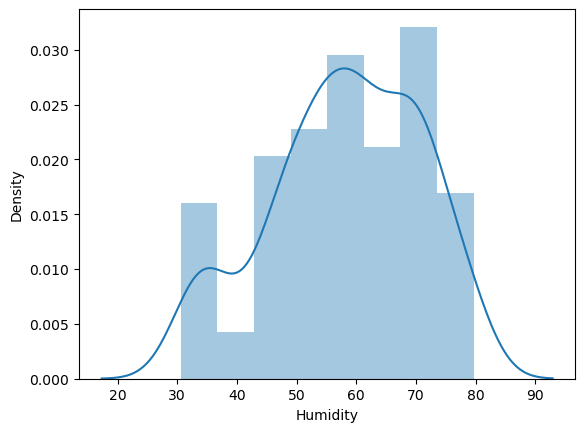

In [30]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

In [31]:
df['Humidity'].value_counts()

Humidity
70.000000    2
55.000000    2
61.591861    1
49.700000    1
73.600000    1
            ..
61.469932    1
64.787434    1
52.727053    1
61.377904    1
56.900000    1
Name: count, Length: 191, dtype: int64

### Variables Qualitatives

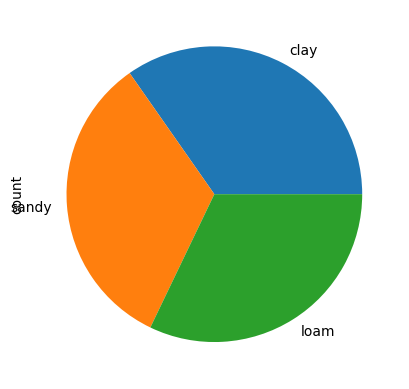

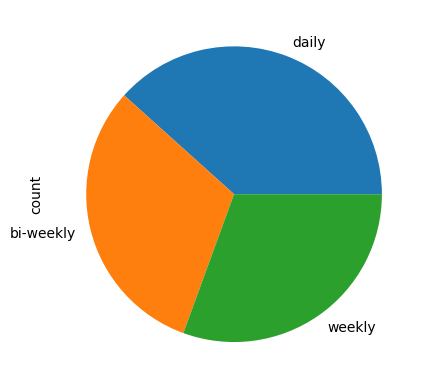

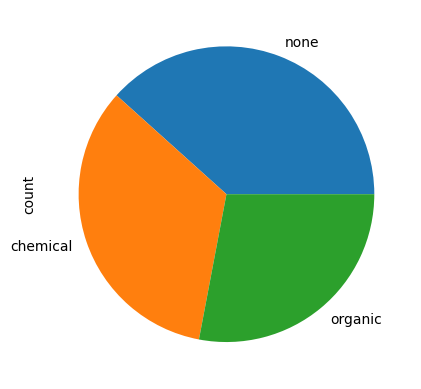

In [35]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

# Relation Target / Variabless

In [38]:
# sns.countplot(x='Humidity', hue='Growth_Milestone', data=df)

sns.countplot(x='Temperature', hue='Growth_Milestone', data=df)

# TrainTest - Nettoyage - Encodage


In [42]:
from sklearn.model_selection import train_test_split

In [44]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [46]:
trainset['Growth_Milestone'].value_counts()


Growth_Milestone
1    77
0    77
Name: count, dtype: int64

In [48]:
testset['Growth_Milestone'].value_counts()

Growth_Milestone
0    20
1    19
Name: count, dtype: int64

In [50]:
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [52]:
df.columns

Index(['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type',
       'Temperature', 'Humidity', 'Growth_Milestone'],
      dtype='object')

In [54]:
df['Water_Frequency'].dtype 

dtype('O')

In [56]:
for i in list(df.columns):
    if pd.api.types.is_object_dtype(df[i]) :
        print(i)

Soil_Type
Water_Frequency
Fertilizer_Type


In [58]:
for i in list(df.columns) :
    if pd.api.types.is_object_dtype(df[i]) :
        df[i]=df[i].astype('category')
        df[i]=df[i].cat.codes

In [60]:
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,5.192294,0,0,31.719602,61.591861,0
1,2,4.033133,2,2,28.919484,52.422276,1
2,1,8.892769,0,1,23.179059,44.660539,0
3,1,8.241144,0,1,18.465886,46.433227,0
4,2,8.374043,0,2,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,2,5.652000,1,1,28.000000,70.200000,0
189,0,7.528000,2,0,30.500000,60.100000,1
190,1,4.934000,0,1,24.500000,61.700000,0
191,2,8.273000,1,2,27.900000,69.500000,1


In [62]:
# effacer toute  les ligne avec des valeurs manquantes 
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

In [64]:
def preprocessing(df):
    
    for i in list(df.columns) :
        if pd.api.types.is_object_dtype(df[i]) :
            df[i]=df[i].astype('category')
            df[i]=df[i].cat.codes

    
    X = df.drop('Growth_Milestone', axis=1)
    y = df['Growth_Milestone']
    
    print(y.value_counts())
    
    return X, y

In [66]:
X_train, y_train = preprocessing(trainset)

Growth_Milestone
1    77
0    77
Name: count, dtype: int64


In [68]:
X_train

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
137,2,5.612000,2,2,19.200000,61.600000
8,1,4.695214,0,1,28.203948,34.560305
171,0,6.341000,2,2,30.900000,69.100000
135,0,8.512000,0,0,21.400000,69.300000
131,2,7.245000,1,1,30.400000,63.400000
...,...,...,...,...,...,...
103,1,7.000000,1,2,30.000000,50.000000
67,0,6.181778,0,0,28.934743,64.787434
117,0,8.443000,1,1,27.600000,49.300000
47,2,9.355354,1,2,27.865764,62.460515


In [70]:
X_test, y_test = preprocessing(testset)

Growth_Milestone
0    20
1    19
Name: count, dtype: int64


In [72]:
y_test

111    0
134    0
44     0
123    1
158    0
118    0
18     1
179    1
146    0
7      0
5      0
126    0
159    1
113    0
80     1
55     0
56     1
37     1
139    1
71     1
33     0
86     1
106    1
153    1
66     1
173    1
164    0
22     0
178    0
154    0
98     0
4      0
181    1
183    1
45     1
130    0
26     0
96     1
141    1
Name: Growth_Milestone, dtype: int64

In [74]:
# Procédure d'évaluation

In [76]:
def evaluation(model,X_train, y_train, X_test, y_test):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                               cv=5, scoring='accuracy',
                                               train_sizes=np.linspace(0.1, 1, 10))
    accuracy = accuracy_score(y_test, ypred)
    print("Accuracy:", accuracy)
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    

In [78]:
X_train

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
137,2,5.612000,2,2,19.200000,61.600000
8,1,4.695214,0,1,28.203948,34.560305
171,0,6.341000,2,2,30.900000,69.100000
135,0,8.512000,0,0,21.400000,69.300000
131,2,7.245000,1,1,30.400000,63.400000
...,...,...,...,...,...,...
103,1,7.000000,1,2,30.000000,50.000000
67,0,6.181778,0,0,28.934743,64.787434
117,0,8.443000,1,1,27.600000,49.300000
47,2,9.355354,1,2,27.865764,62.460515


# SVC

In [81]:
# standarisation / normalisation
for column in df.columns: 
    df[column] = df[column]  / df[column].abs().max() 

In [83]:
# Model SVC : support vector classifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='scale',probability=True))
clf.fit(X_train, y_train)
Score1 = clf.score(X_train,y_train)
Score2 = clf.score(X_test,y_test)
print(Score1)
print(Score2)

0.7597402597402597
0.5384615384615384


In [85]:
X_train

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity
137,2,5.612000,2,2,19.200000,61.600000
8,1,4.695214,0,1,28.203948,34.560305
171,0,6.341000,2,2,30.900000,69.100000
135,0,8.512000,0,0,21.400000,69.300000
131,2,7.245000,1,1,30.400000,63.400000
...,...,...,...,...,...,...
103,1,7.000000,1,2,30.000000,50.000000
67,0,6.181778,0,0,28.934743,64.787434
117,0,8.443000,1,1,27.600000,49.300000
47,2,9.355354,1,2,27.865764,62.460515


In [87]:
X = np.array([0,0.5,1,0.8,0.8,0.6]).reshape(-1, 1)

print(X.T)
y_pred=clf.predict(X.T) 
print(y_pred)
print(np.exp(clf.predict_log_proba(X.T)))



[[0.  0.5 1.  0.8 0.8 0.6]]
[0]
[[0.49169507 0.50830493]]


C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [133]:
# sns.histplot(data=probabilities[:, 0], bins=20, kde=True)
# plt.xlabel("Probabilité d'appartenir à la classe 0")
# plt.ylabel("Nombre d'échantillons")
# plt.title("Distribution des probabilités pour la classe 0")
# plt.show()

# # Histogramme pour la classe 1
# sns.histplot(data=probabilities[:, 1], bins=20, kde=True,color='green')
# plt.xlabel("Probabilité d'appartenir à la classe 1")
# plt.ylabel("Nombre d'échantillons")
# plt.title("Distribution des probabilités pour la classe 1")
# plt.show()


In [135]:
# sns.histplot(data=probabilities, bins=20, kde=True)
# plt.xlabel("Probabilité")
# plt.ylabel("Nombre d'échantillons")
# plt.title("Distribution des probabilités par classe")
# plt.show()

In [137]:

# mean_probabilities = np.mean(probabilities, axis=0)

# plt.pie(mean_probabilities, labels=["Classe 0", "Classe 1"])
# plt.show()

# Logistic regression

In [96]:
# Logistic Regression

from sklearn.linear_model import LogisticRegressionCV

clf2 = LogisticRegressionCV(cv=10, random_state=0,scoring='accuracy', penalty='l2').fit( X_train, y_train)
y_pred=clf2.predict(X_test)

Score3 = clf2.score(X_train,y_train)
Score4 = clf2.score(X_test,y_test)
print(Score3)
print(Score4)

0.5714285714285714
0.48717948717948717


In [98]:
# Prédiction et probabilités
X2 = np.array([1,0.5,1,0.5,0.8,0.6]).reshape(-1, 1)
y_pred2 = clf2.predict(X.T)
print("Classe prédite:", y_pred2)

# Probabilités pour chaque classe
probabilities = clf2.predict_proba(X2.T)
print("Probabilités:", probabilities)

Classe prédite: [1]
Probabilités: [[0.36344709 0.63655291]]


C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


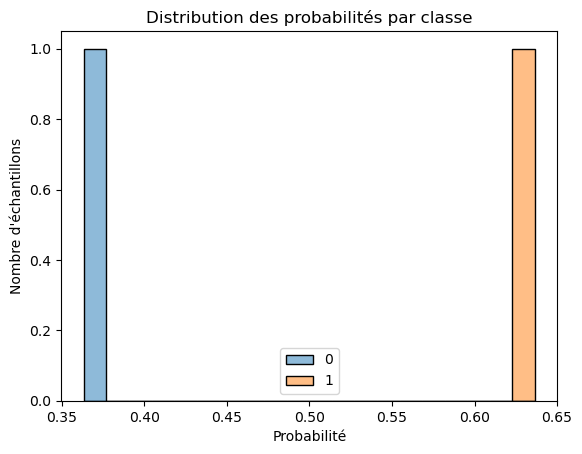

In [100]:
sns.histplot(data=probabilities, bins=20, kde=True)
plt.xlabel("Probabilité")
plt.ylabel("Nombre d'échantillons")
plt.title("Distribution des probabilités par classe")
plt.show()

Text(0.5, 1.0, 'Comparaison de 2 Modeles')

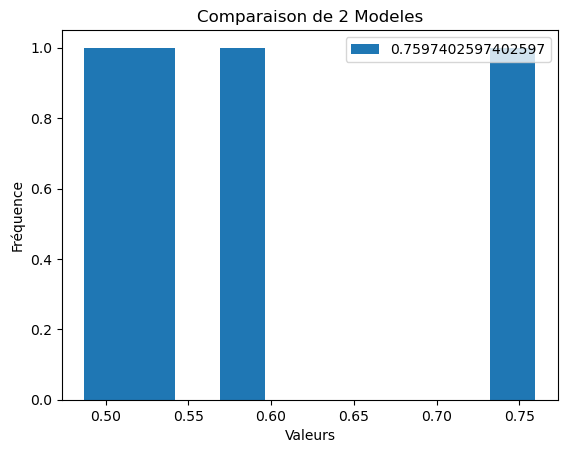

In [102]:
plt.hist([Score1, Score2, Score3, Score4], label = [Score1, Score2, Score3, Score4])

plt.legend(loc='upper right')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.title('Comparaison de 2 Modeles')

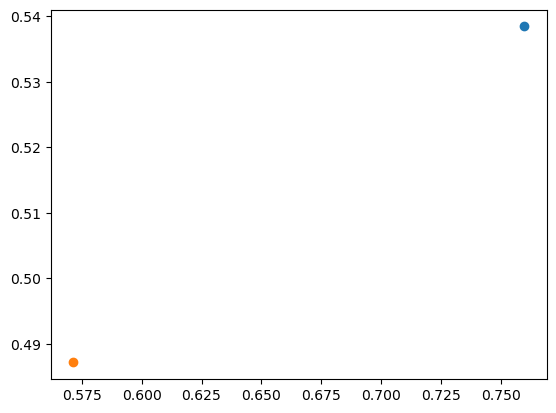

In [104]:
plt.scatter(Score1, Score2, label='Données 1')
plt.scatter(Score3, Score4, label='Données 1')

# # modelisation generale de differente modeles et comparaison

In [107]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

In [109]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [111]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [113]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[ 8 12]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        20
           1       0.48      0.58      0.52        19

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.48        39
weighted avg       0.49      0.49      0.48        39

AdaBoost
[[ 8 12]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.54      0.74      0.62        19

    accuracy                           0.56        39
   macro avg       0.58      0.57      0.55        39
weighted avg       0.58      0.56      0.55        39



C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ben

SVM
[[10 10]
 [11  8]]
              precision    recall  f1-score   support

           0       0.48      0.50      0.49        20
           1       0.44      0.42      0.43        19

    accuracy                           0.46        39
   macro avg       0.46      0.46      0.46        39
weighted avg       0.46      0.46      0.46        39

KNN
[[ 9 11]
 [10  9]]
              precision    recall  f1-score   support

           0       0.47      0.45      0.46        20
           1       0.45      0.47      0.46        19

    accuracy                           0.46        39
   macro avg       0.46      0.46      0.46        39
weighted avg       0.46      0.46      0.46        39



C:\Users\bensa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\bensa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


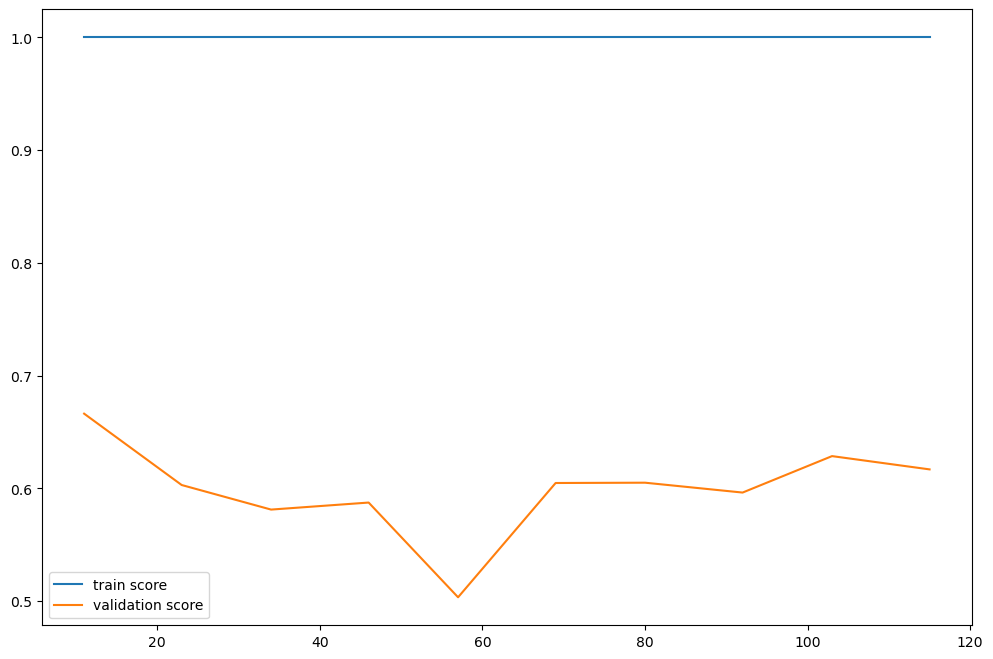

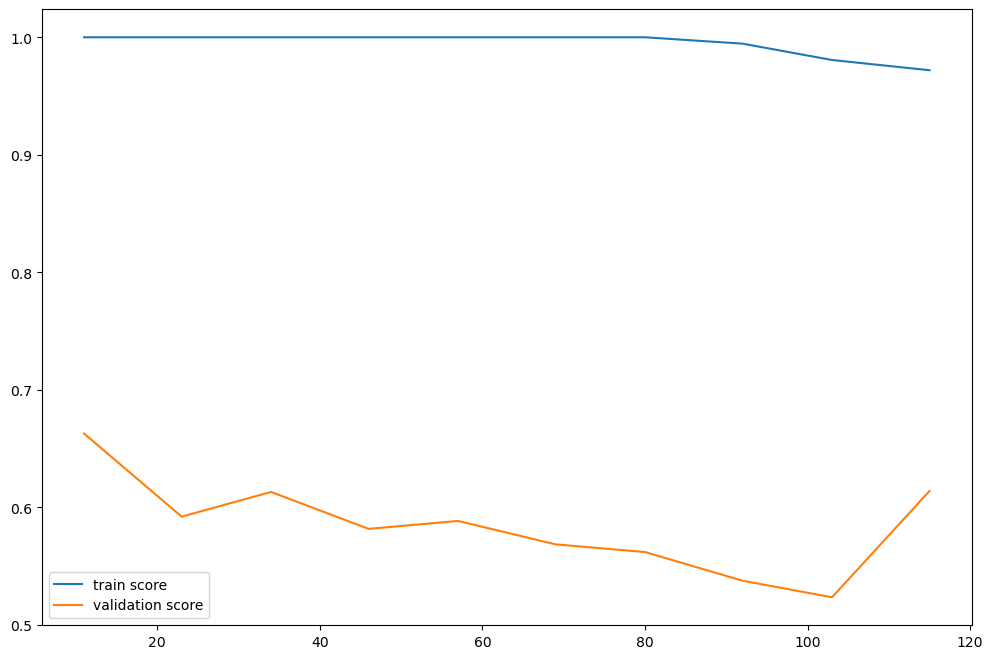

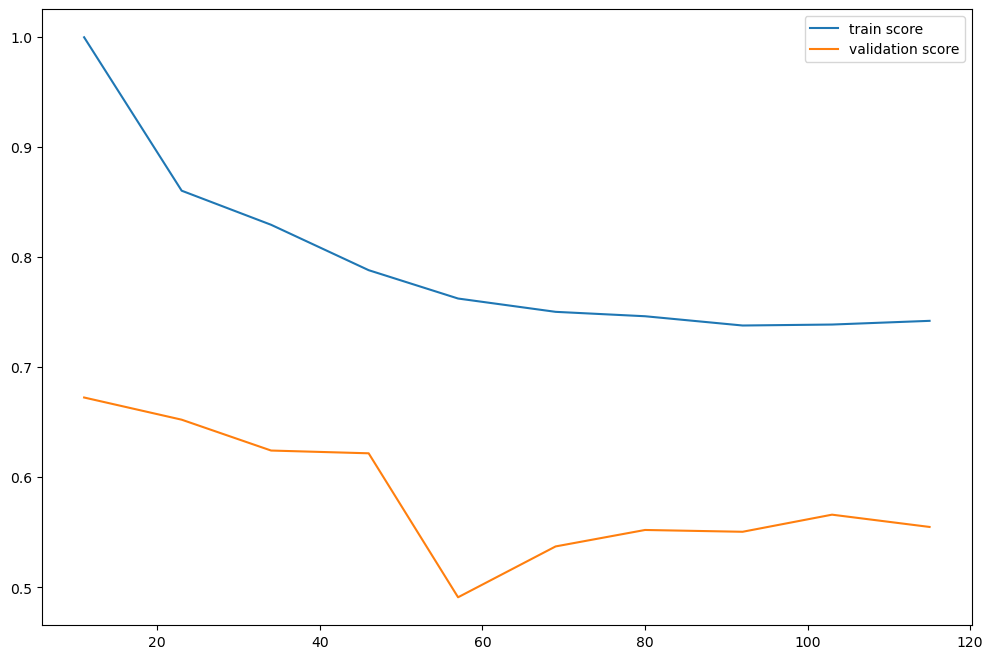

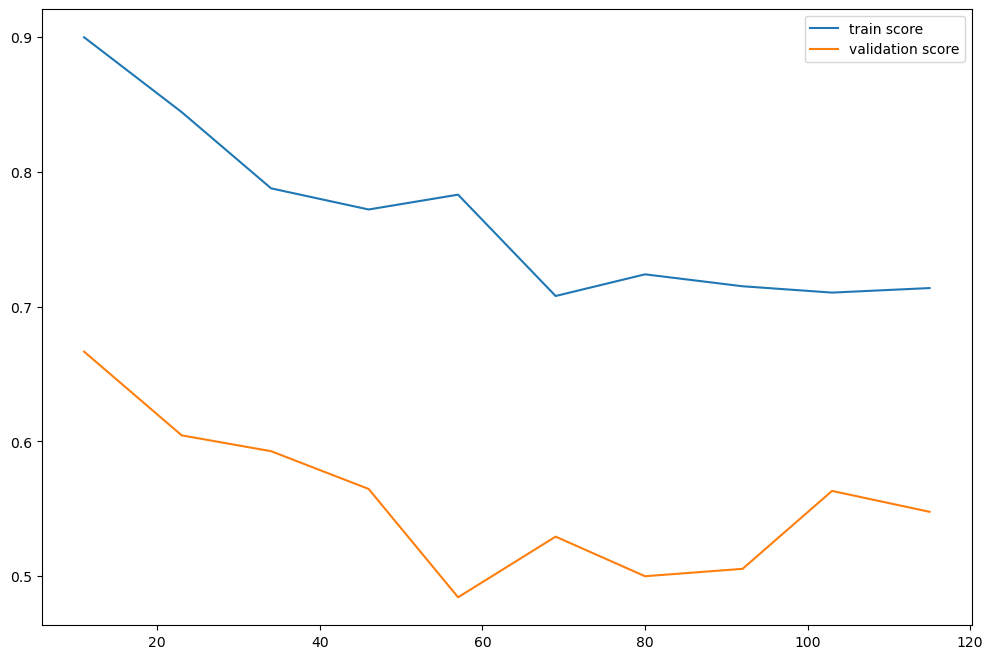

In [115]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

###  En va continuer avec SVC

### optimisatiion

In [118]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [119]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [120]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [121]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=50 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=50 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=50 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=50 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=53 is greater than n_features=27. All the features will be returned.
  warnings.warn(


{'svc__gamma': 0.0001, 'svc__C': 1, 'pipeline__selectkbest__k': 58, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        20
           1       0.39      0.37      0.38        19

    accuracy                           0.41        39
   macro avg       0.41      0.41      0.41        39
weighted avg       0.41      0.41      0.41        39



C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(


C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(


[[ 9 11]
 [12  7]]
              precision    recall  f1-score   support

           0       0.43      0.45      0.44        20
           1       0.39      0.37      0.38        19

    accuracy                           0.41        39
   macro avg       0.41      0.41      0.41        39
weighted avg       0.41      0.41      0.41        39



C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(
C:\Users\bensa\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=58 is greater than n_features=27. All the features will be returned.
  warnings.warn(


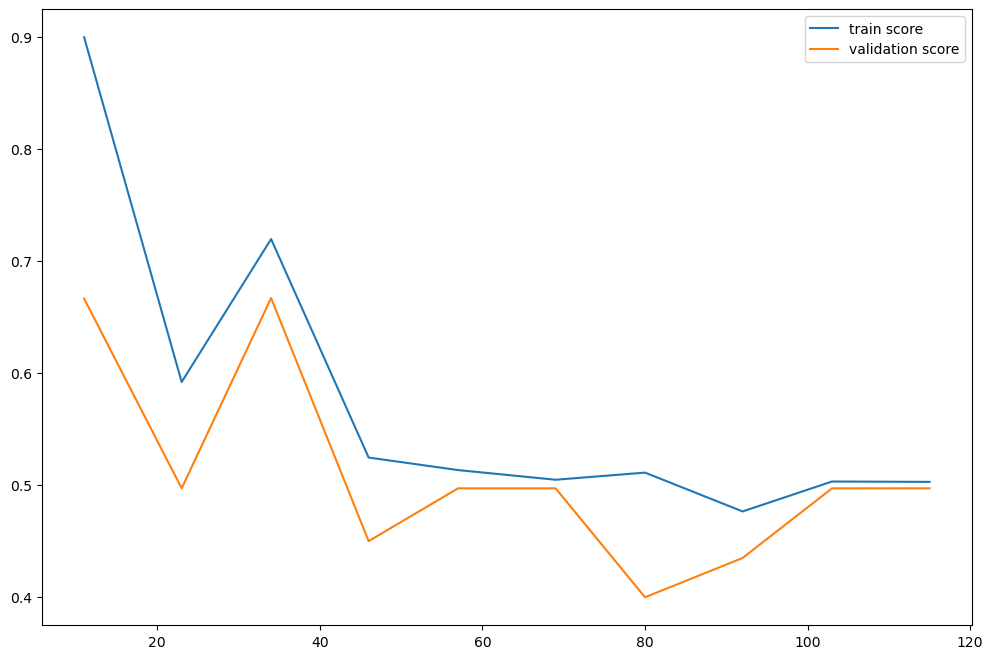

In [122]:
evaluation(grid.best_estimator_)

## Precision Recall Curve

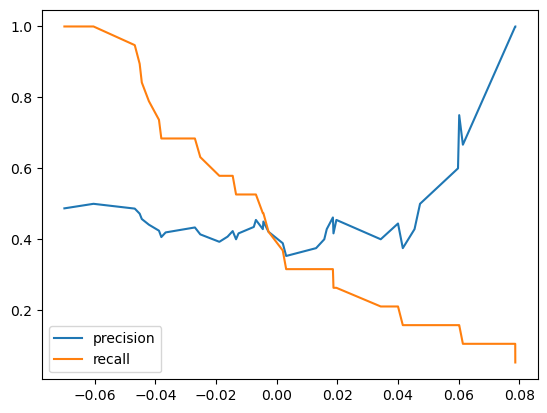

In [124]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

# saving the model

In [144]:
print(type(model))

<class 'sklearn.pipeline.Pipeline'>


In [146]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import joblib

# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

# Entraînement du pipeline
pipeline.fit(X_train, y_train)

# Enregistrement des composants
joblib.dump(pipeline.named_steps['scaler'], 'scaler.pkl')
joblib.dump(pipeline.named_steps['clf'], 'model.pkl')

['model.pkl']